In [64]:
import sklearn.linear_model
import pandas as pd
import numpy as np



In [65]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [66]:

%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [67]:
#Função para combinar os dados das nossas bases e fazer as devidas limpezas
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [68]:
#função para puxar os dados via url e formar a pasta local
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

[[5.96242338]]


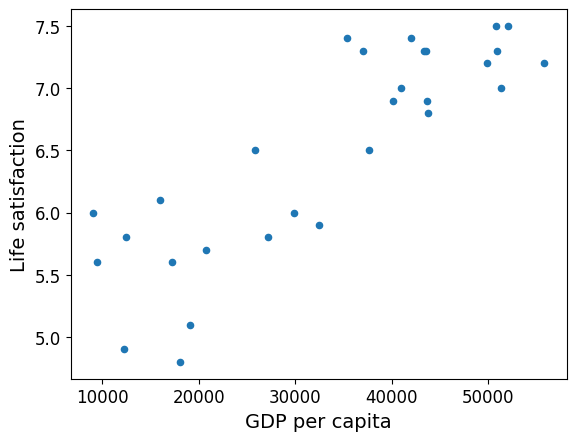

In [ ]:
#Declaração dos caminhos
oecd_bli = pd.read_csv("caminho dos dados",thousands=',')
gdp_per_capita = pd.read_csv("caminho dos dados",thousands=',',delimiter='\t',encoding='latin1', na_values="n/a")

#Chamada da função de limpeza e junção dos dados
country_states = prepare_country_stats(oecd_bli,gdp_per_capita)
x = np.c_[country_states["GDP per capita"]]
y = np.c_[country_states["Life satisfaction"]]

#Definindo plotagem
country_states.plot(kind='scatter',x="GDP per capita",y='Life satisfaction')

#Usamos o modelo de regressão linear
model = sklearn.linear_model.LinearRegression()
model.fit(x,y)
x_new=[[22587]]
print(model.predict(x_new))